In [114]:
### Titam insurance company case study

In [115]:
import numpy as np
import pandas as pd
import math as mt

In [116]:
titandata=pd.read_csv("titan.csv")
titandata.info()
titandata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
SALESPERSON    30 non-null int64
OldScheme      30 non-null int64
NewScheme      30 non-null int64
dtypes: int64(3)
memory usage: 800.0 bytes


,SALESPERSON,OldScheme,NewScheme
count,30.000000,30.000000,30.000000
mean,15.500000,68.033333,72.033333
std,8.803408,20.455980,24.062395
min,1.000000,28.000000,32.000000
25%,8.250000,54.000000,55.000000
50%,15.500000,67.000000,74.000000
75%,22.750000,81.500000,85.750000
max,30.000000,110.000000,122.000000


In [117]:
print("Mean of Old Scheme : ", titandata["OldScheme"].mean() , "\n" , "Mean of New Scheme : ", titandata["NewScheme"].mean())
print("Standard deviation : ", (titandata["NewScheme"]-titandata["OldScheme"]).std())

Mean of Old Scheme :  68.03333333333333 
 Mean of New Scheme :  72.03333333333333
Standard deviation :  14.08104619937615


In [118]:
## Q : Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points)

In [119]:
#The paired sample t-test has to be considered here, since the sample collected on same individual before and after a time point.
#However, to conduct this test, we need to check if there any significant outliers, and how the distribution is. 
#If both fails, then we may need to go for wilcoxon test

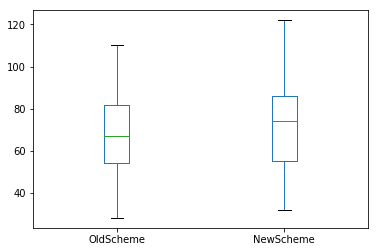

In [120]:
#Checking using boxplot if the outlier showsup
import matplotlib.pyplot as plt
titandata[['OldScheme', 'NewScheme']].plot(kind='box')

Text(0.5, 1.0, ' Difference Q-Q Plot')

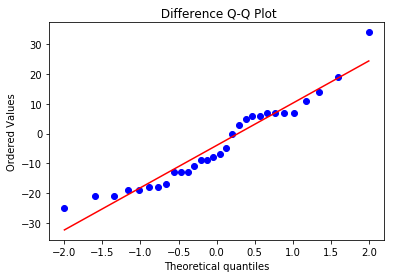

In [121]:
#Checking for distribution. the data should be on the red line. If it’s not, then it suggests that the data may not be normally distributed.
titandata['titan_difference'] = titandata["OldScheme"] - titandata["NewScheme"]
stats.probplot(titandata['titan_difference'] , plot= plt)
plt.title(' Difference Q-Q Plot')

In [122]:
#Since both the check points seems passed, we need not go for wilcoxon method of testing.
from scipy import stats
tvalue, pvalue = stats.ttest_rel(titandata["OldScheme"],titandata["NewScheme"])
#stats.wilcoxon(titandata["OldScheme"],titandata["NewScheme"])
pvalue = pvalue/2;

print("Final pvalue : ",pvalue)

Final pvalue :  0.06528776980668831


In [123]:
## Q: What conclusion does the test (p-value) lead to? (2.5 points)
## A:
#P value is > 0.05. Hence accept the null hypothesis that the new scheme did not raise the output significantly

In [124]:
#Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:
#Q1: The probability of a type 1 error? (2.5 points)
#Q2: What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)
#Q3: Power of the test (5 points)

In [125]:
#Probability of Type I error is predetermined by significance level. If the significance level is 0.05, 
#then type I error is 0.05. i.e. 5% probability we make Type I error– rejecting null hypothesis when it is true


In [126]:
#define tcritical value
p = 0.95
df = 30
print(stats.t.ppf(p, df))

1.6972608943617378


In [127]:
#Formula for Tstat is ((d-uD)/Sd)/sqrt(n). 

#1.6972 = ((d - 0)/14.08)/sqrt(30)

d = 1.6972*(14/mt.sqrt(30))

In [131]:
#From the above calculation, we incorrectly fail to reject the null hypothesis as long as we draw samples where the difference of mean is less than 4.37K
#Now, since the scenario given to us is diff of mean is 5k, we can compute the probability of drawing the sample mean difference lesser than 4.37K

tstat = (4.3381 - 5)/2.571
tstat

-0.25744846363282775

In [132]:
n=30
pval = stats.t.sf(np.abs(tstat), n-1)
pval

0.39932531760362083

In [133]:
# Probablitiy of making type2 error is 39.93%
print("Power of hypothesis test is  : ", (1-pval)*100 , "%")


Power of hypothesis test is  :  60.06746823963791 %
